In [1]:
import scanpy as sc
import matplotlib as mpl

In [2]:
# 设置参数
mpl.rcParams["pdf.fonttype"] = 42  # 保留字体
sc.settings.verbosity = 4  # 输出细节
sc._settings.ScanpyConfig.n_jobs = -1  # 使用所有核心
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=600,
    facecolor="white",
    frameon=False,  # remove frame
)

In [3]:
adata = sc.read("anndata_cluster.h5ad")
adata

/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 18530 × 5000
    obs: 'group', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'discard', 'n_genes', 'doublet_score', 'predicted_doublet', 'size_factors', 'leiden', '_scvi_batch', '_scvi_labels', 'leiden_0_25', 'leiden_0_5', 'leiden_2'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'group_colors', 'hvg'

In [4]:
adata.var_names_make_unique()

In [5]:
# rcParams['figure.figsize'] = 4, 4

In [6]:
# adata.obs["celltypist_cell_label_coarse"] = pd.Categorical(
#     adata.obs["celltypist_cell_label_coarse"]
# )
group_by = "leiden_0_25"

sc.tl.rank_genes_groups(
    adata,
    groupby=group_by,
    method="t-test",
    use_raw=False,
    layer="scran_normalization",
)

ranking genes
    consider 'leiden_0_25' groups:
    with sizes: [4556 3142 2911 2844 1978  762  717  639  407  381  193]
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


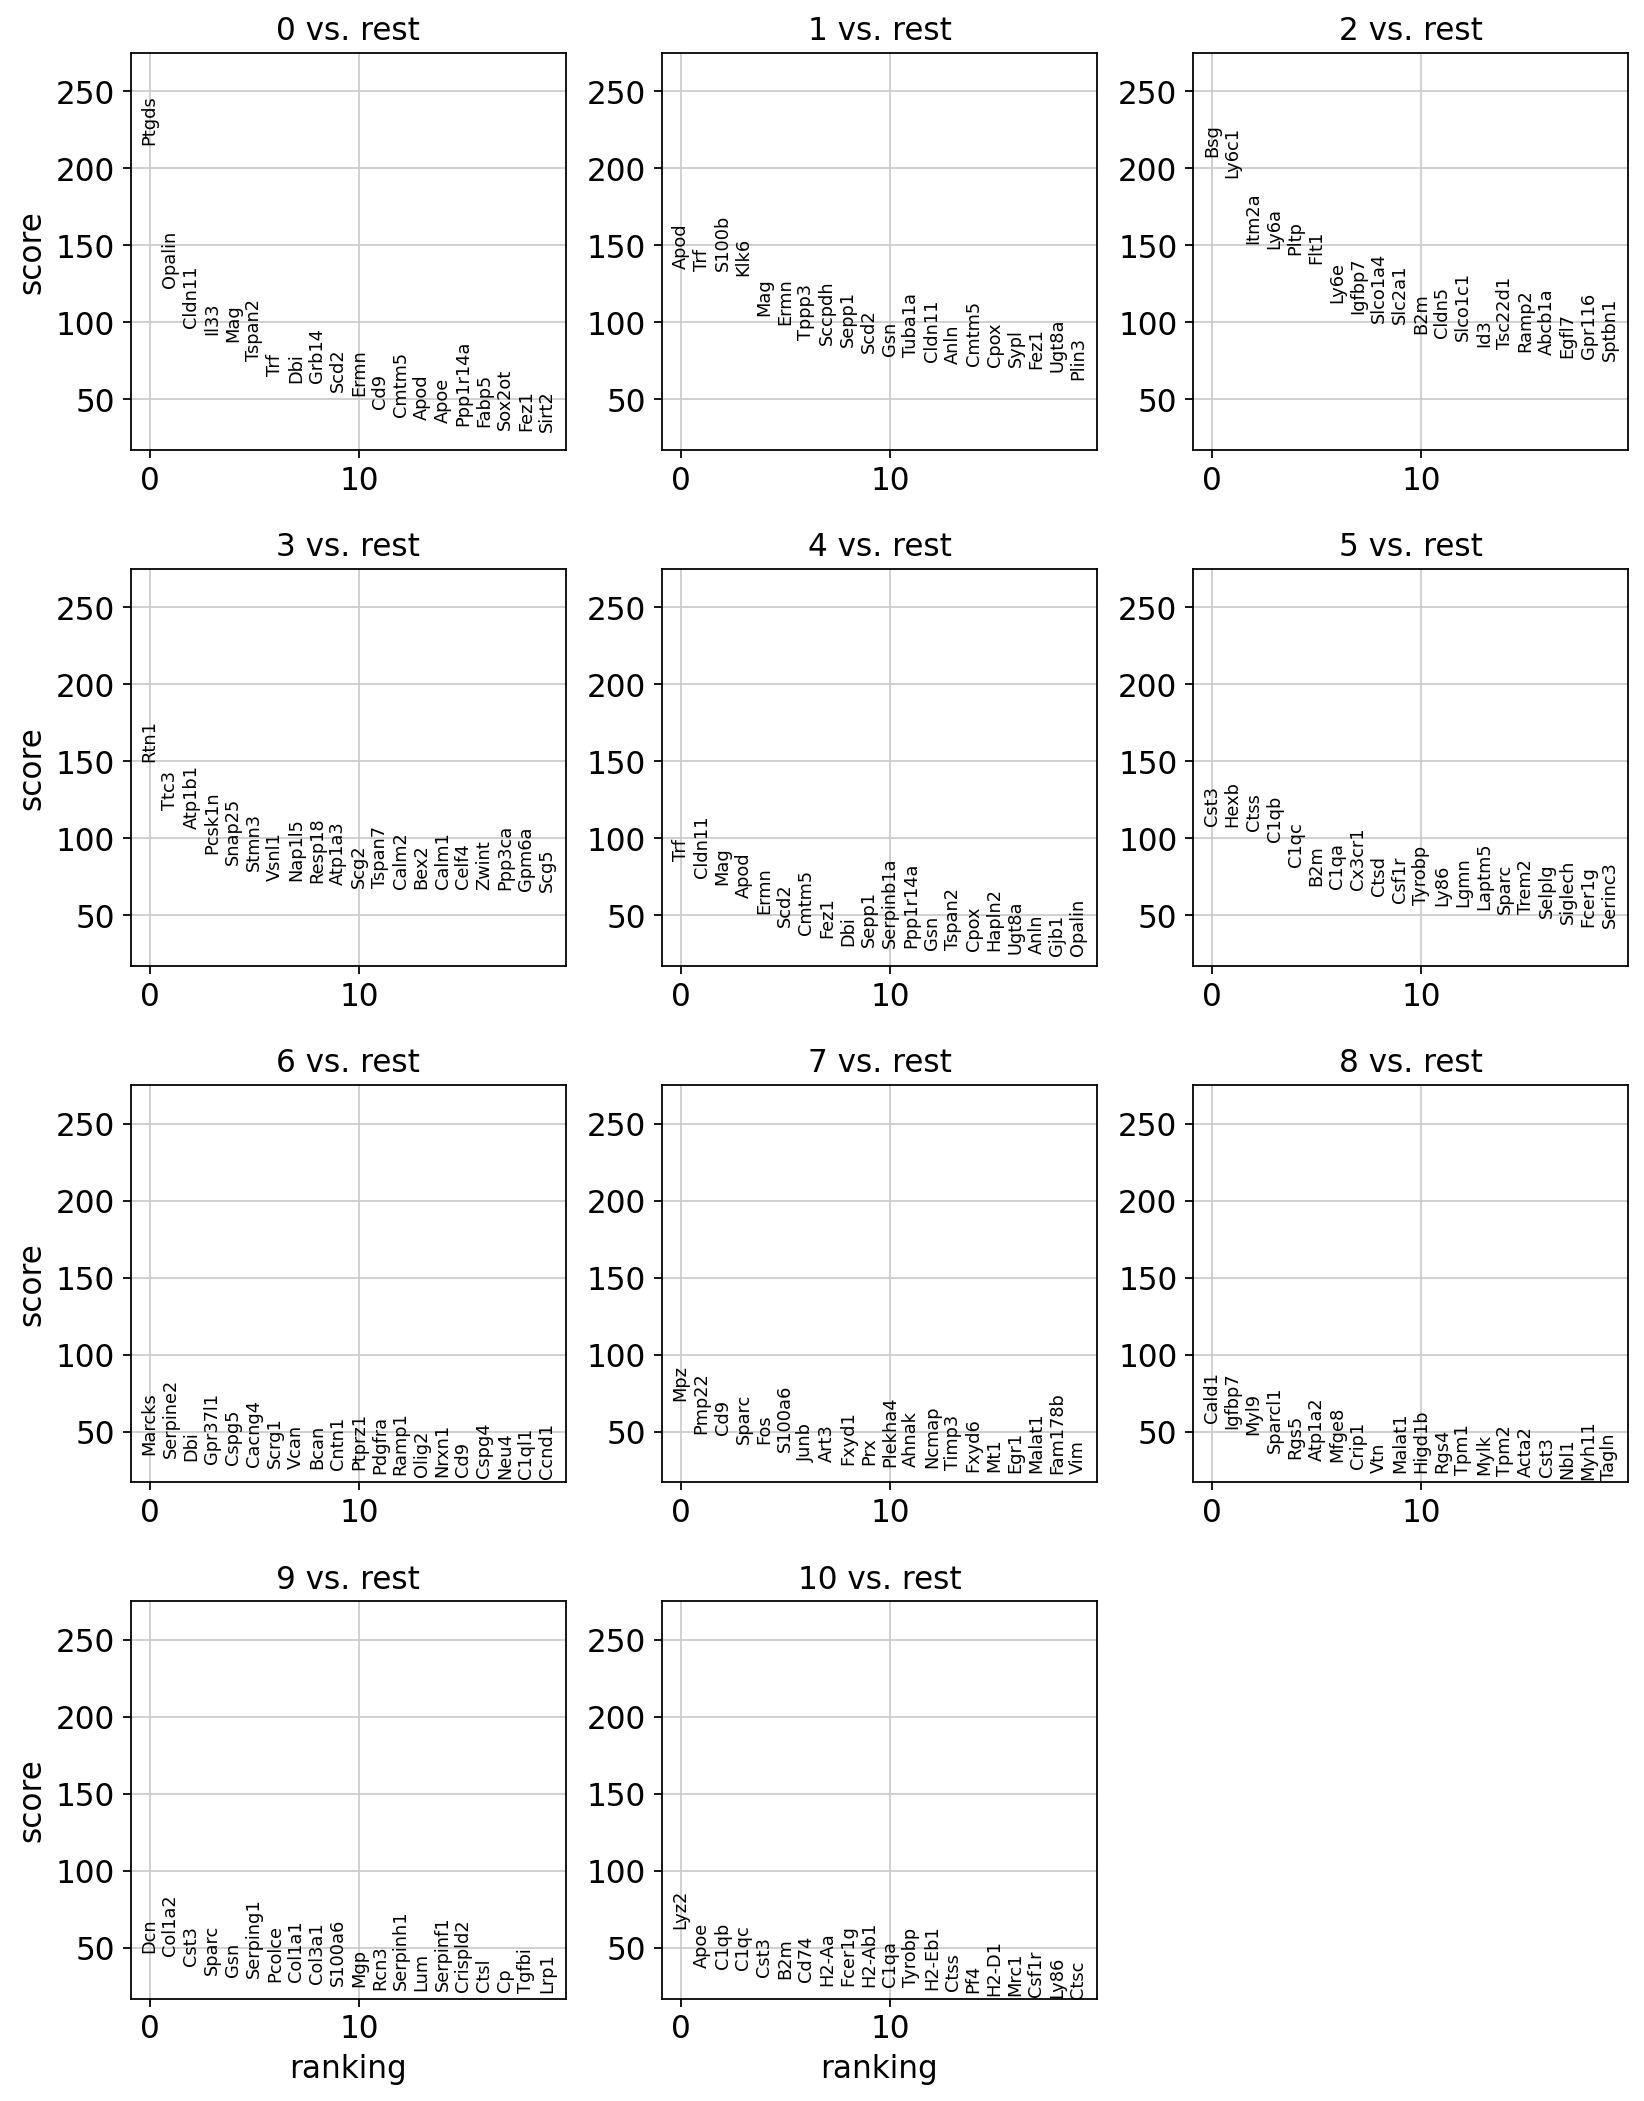

In [7]:
sc.pl.rank_genes_groups(adata, ncols=3)

/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for

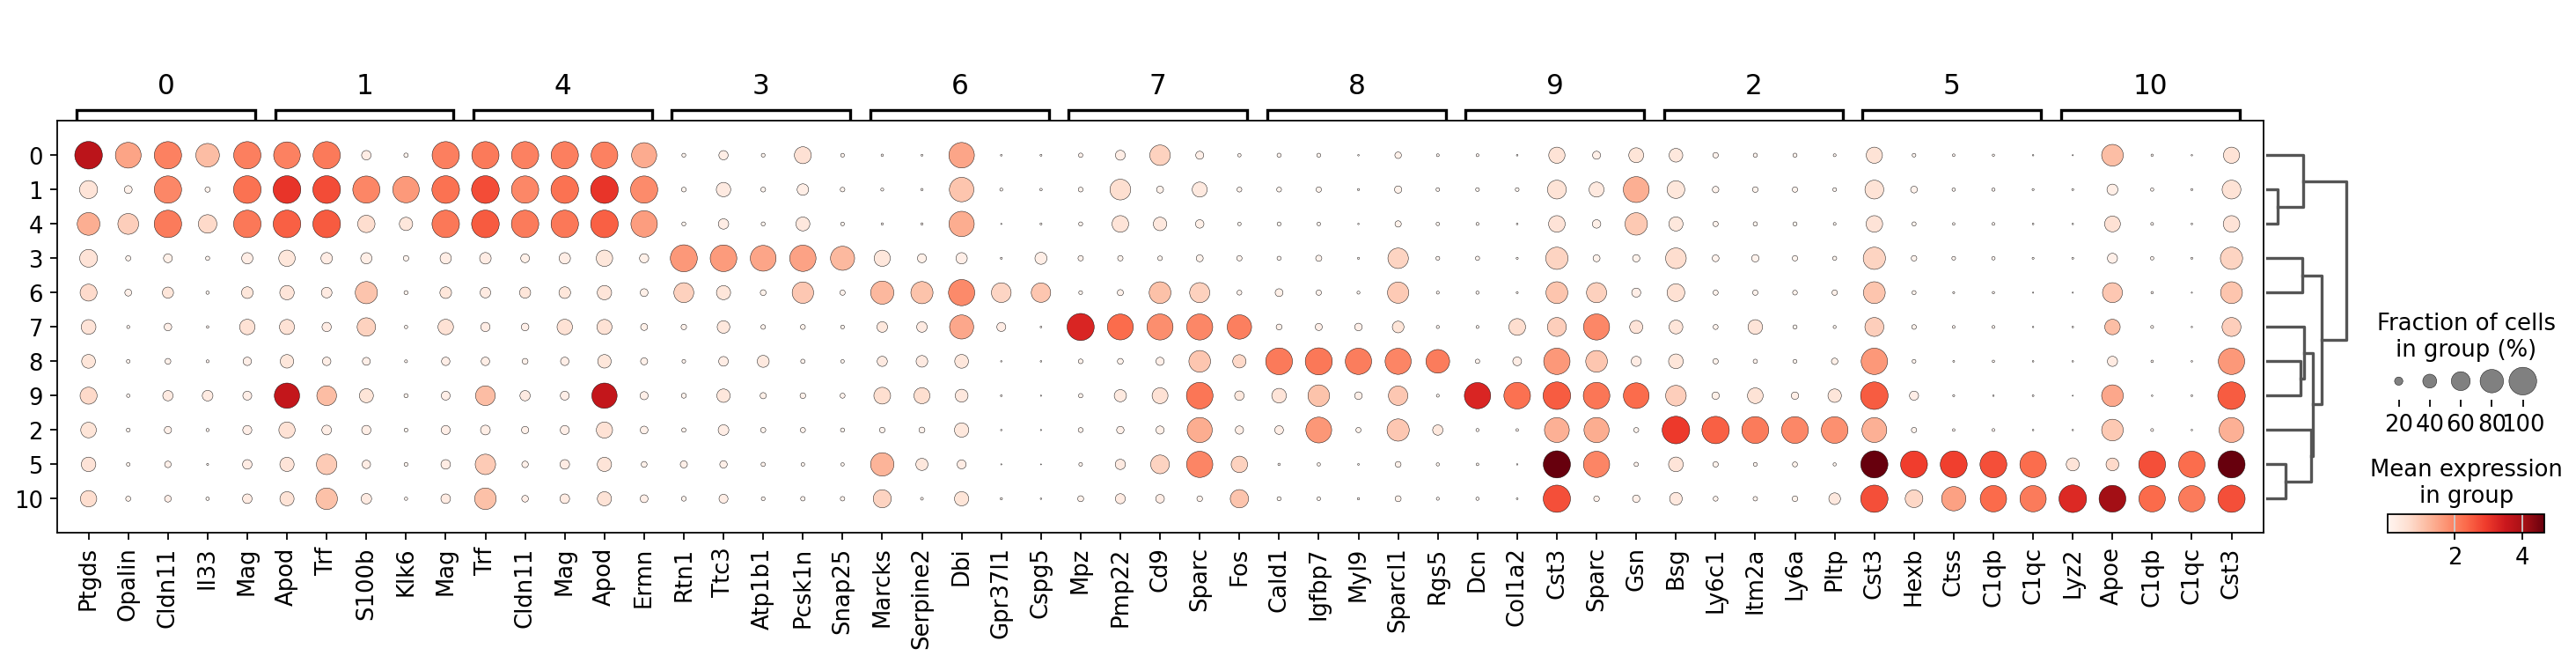

In [9]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    n_genes=5,
    use_raw=False,
    # vmin=0,
    # vmax=20,
)

/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for

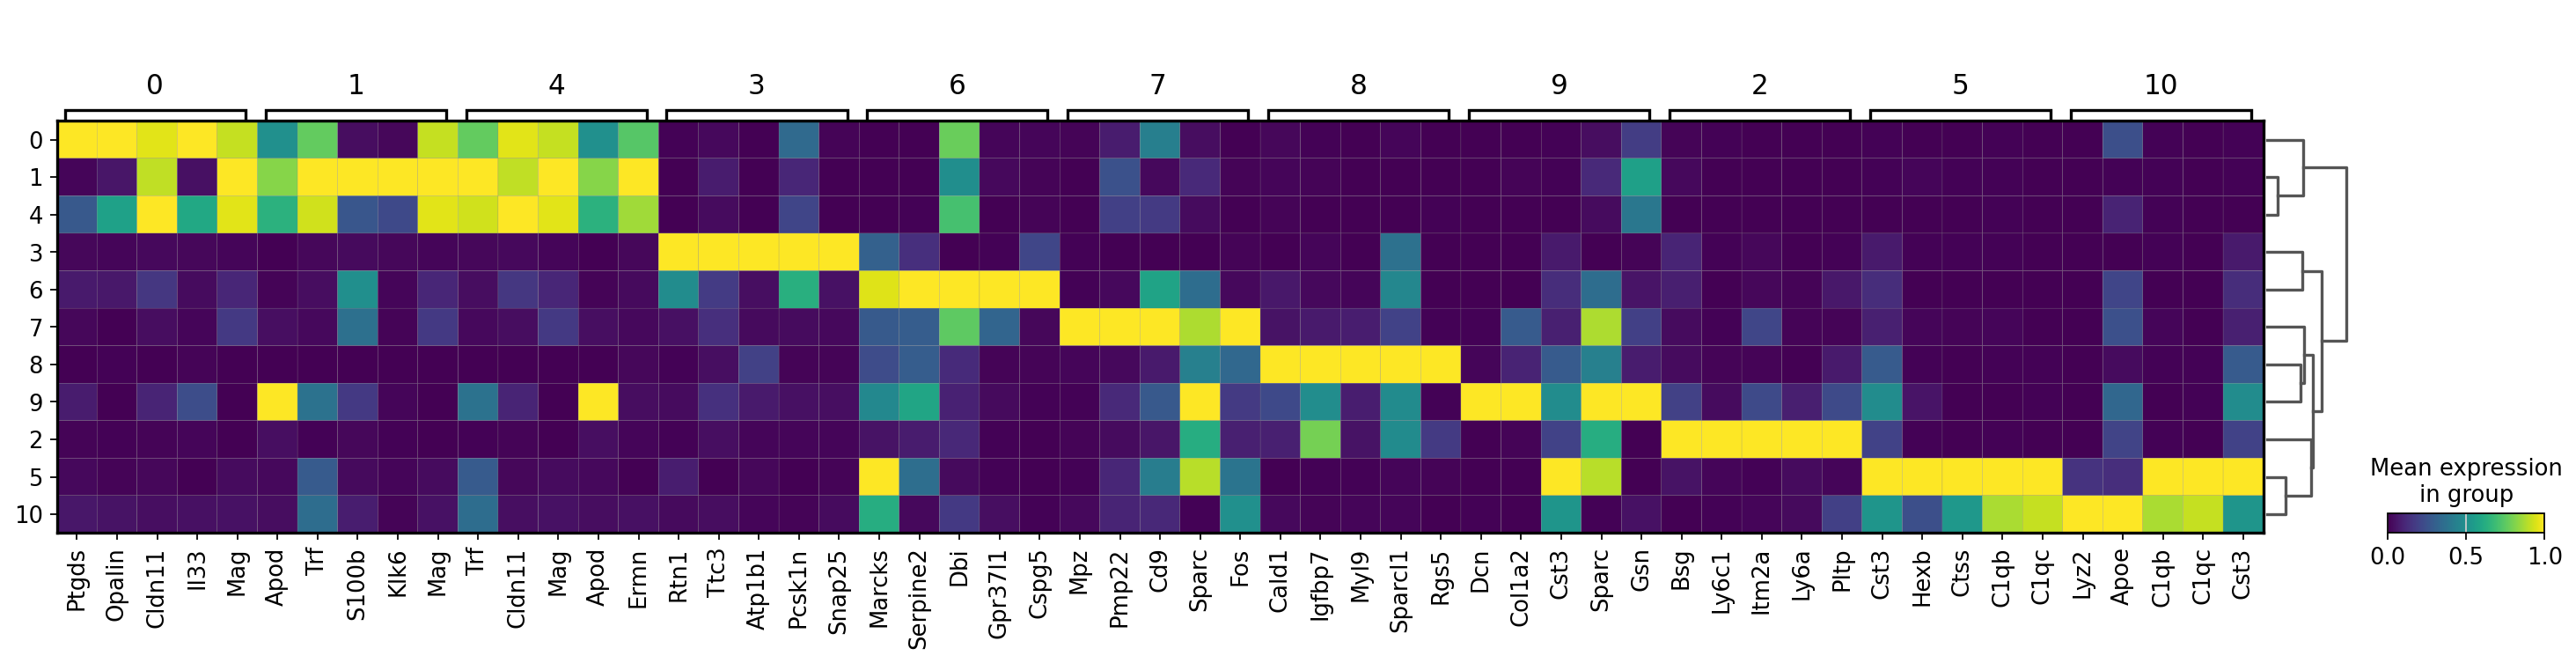

In [10]:
sc.pl.rank_genes_groups_matrixplot(
    adata,
    n_genes=5,
    standard_scale="var",
    use_raw=False,
)

In [11]:
## 过滤
# min_in_group_fraction: 0.25 min_fold_change: 2, max_out_group_fraction: 0.5
# 为了保留 adata.uns['rank_genes_groups'] 的原始结构，过滤基因设置为NaN。
sc.tl.filter_rank_genes_groups(
    adata,
    min_fold_change=2,  # 最小折叠变化阈值
    min_in_group_fraction=0.25,  # 在组内的最小基因表达比例
    max_out_group_fraction=0.5,  # 在组外的最大基因表达比例
    key="rank_genes_groups",  # 基因组数据的键
    key_added="rank_genes_groups_filtered",  # 过滤后的基因组数据的键
    use_raw=False,
)

Filtering genes using: min_in_group_fraction: 0.25 min_fold_change: 2, max_out_group_fraction: 0.5


categories: 0, 1, 2, etc.
var_group_labels: 0, 1, 2, etc.


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for

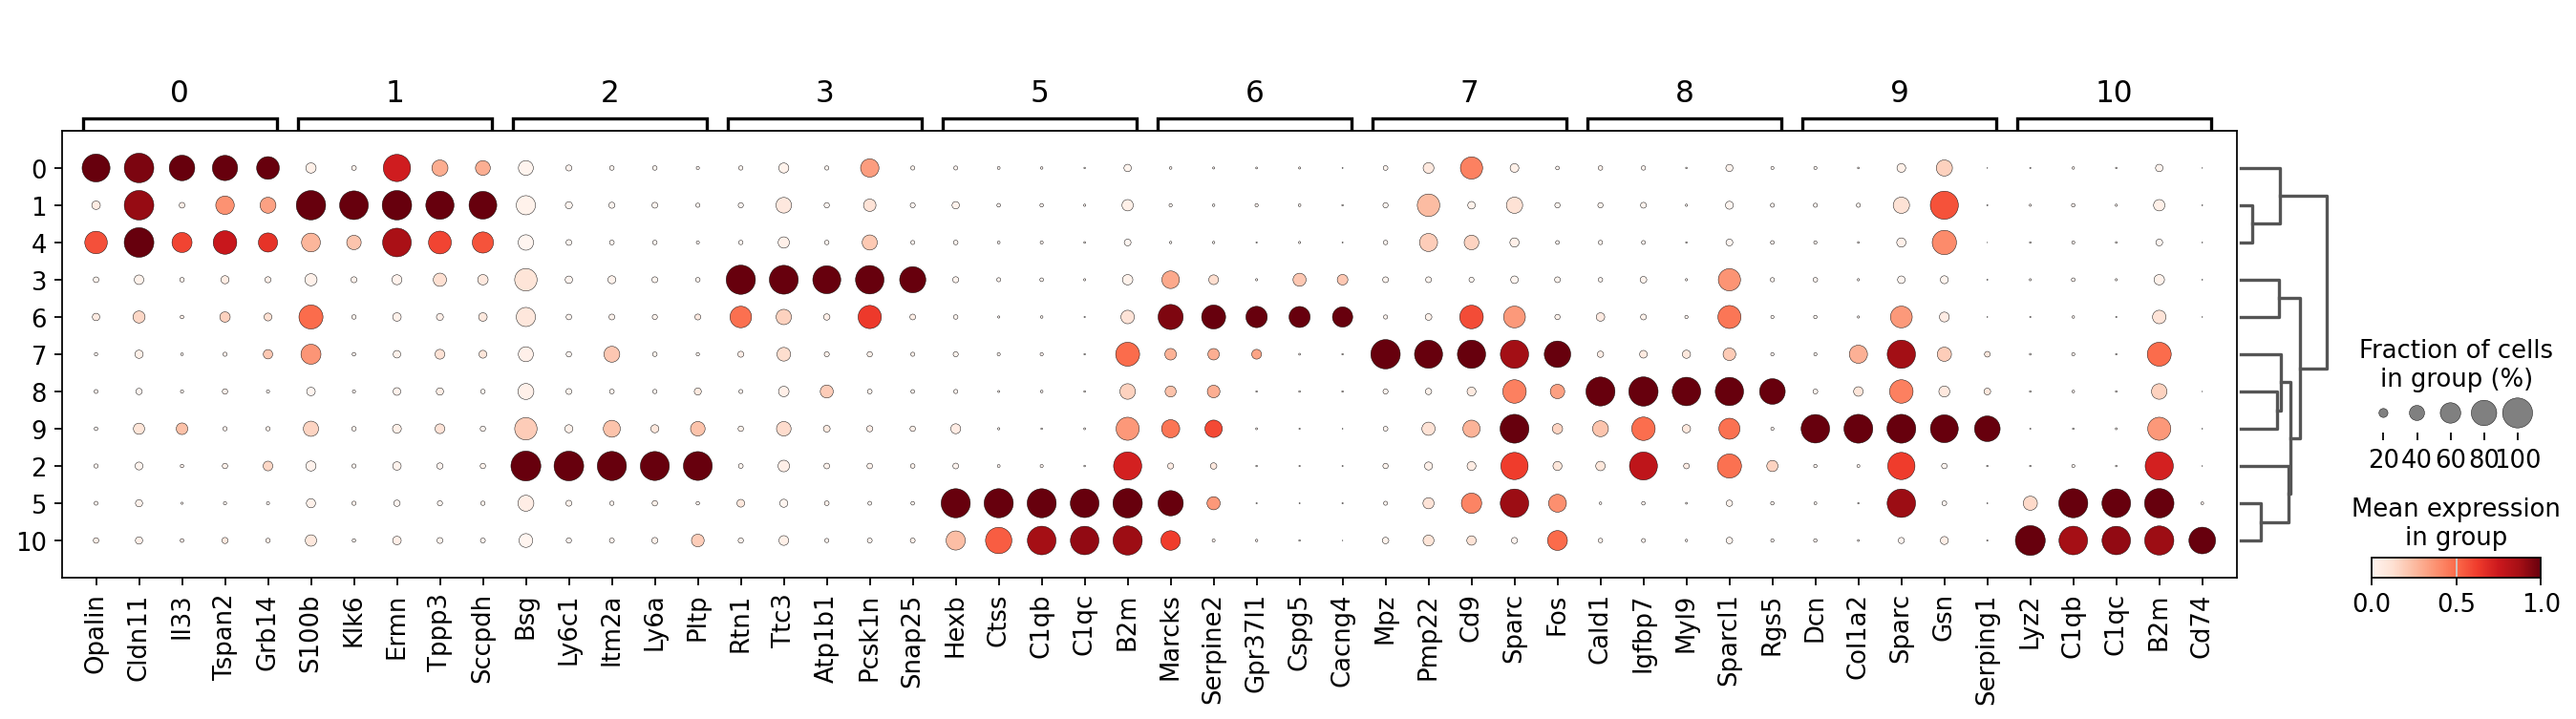

In [13]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    groupby=group_by,
    standard_scale="var",
    n_genes=5,
    key="rank_genes_groups_filtered",
    use_raw=False,
)

categories: 0, 1, 2, etc.
var_group_labels: 0, 1, 2, etc.


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for

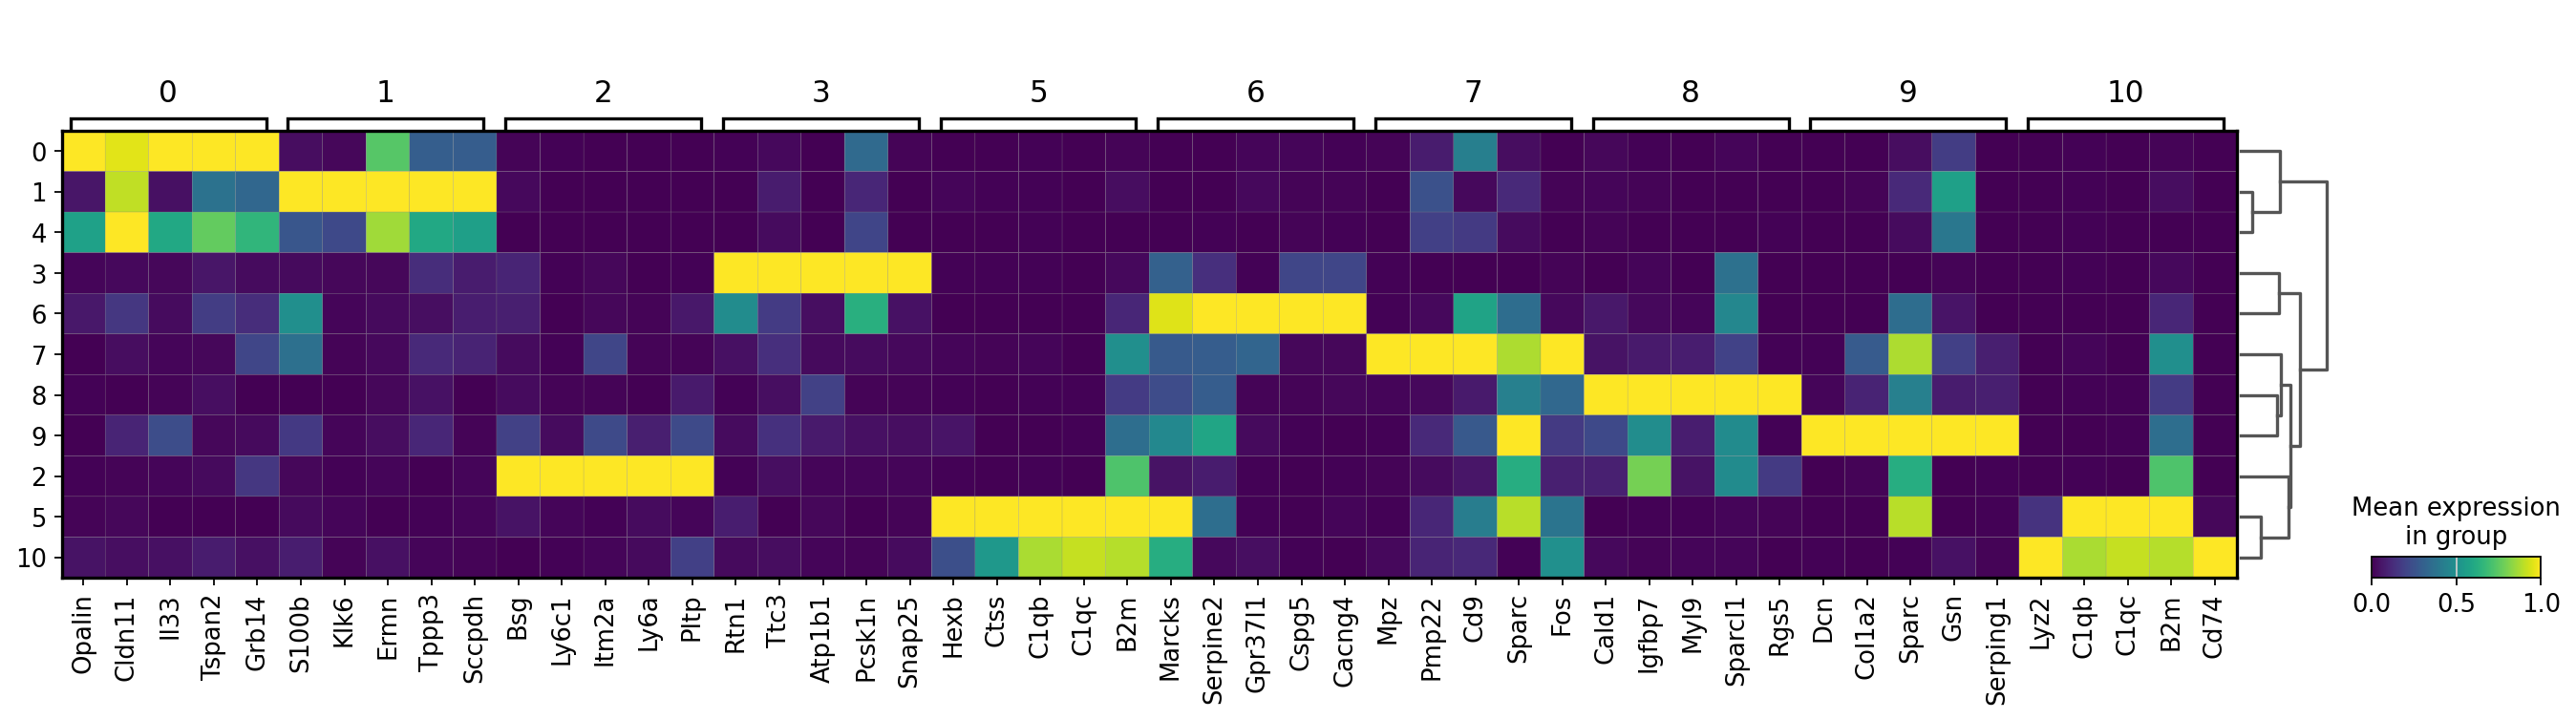

In [14]:
sc.pl.rank_genes_groups_matrixplot(
    adata,
    n_genes=5,
    standard_scale="var",
    key="rank_genes_groups_filtered",
    use_raw=False,
)

In [16]:
##  保存全部maker列表

deg_table = sc.get.rank_genes_groups_df(
    adata,
    group=adata.obs[group_by].unique(),
    key="rank_genes_groups_filtered",
)
deg_table = deg_table.dropna(subset=["names"])
deg_table[:5]
deg_table.to_csv("table/21-all_filtered_rank_genes.csv", index=False)

/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


In [17]:
## 分别保存

for group in adata.obs[group_by].unique():
    rank_genes_df = sc.get.rank_genes_groups_df(
        adata, group=group, key="rank_genes_groups_filtered"
    )
    # 前面的过滤会生成NaN
    rank_genes_df = rank_genes_df.dropna(subset=["names"])

    # 将数据框保存为CSV文件
    rank_genes_df.to_csv(f"table/21-{group}_rank_genes.csv", index=False)

/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for

/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


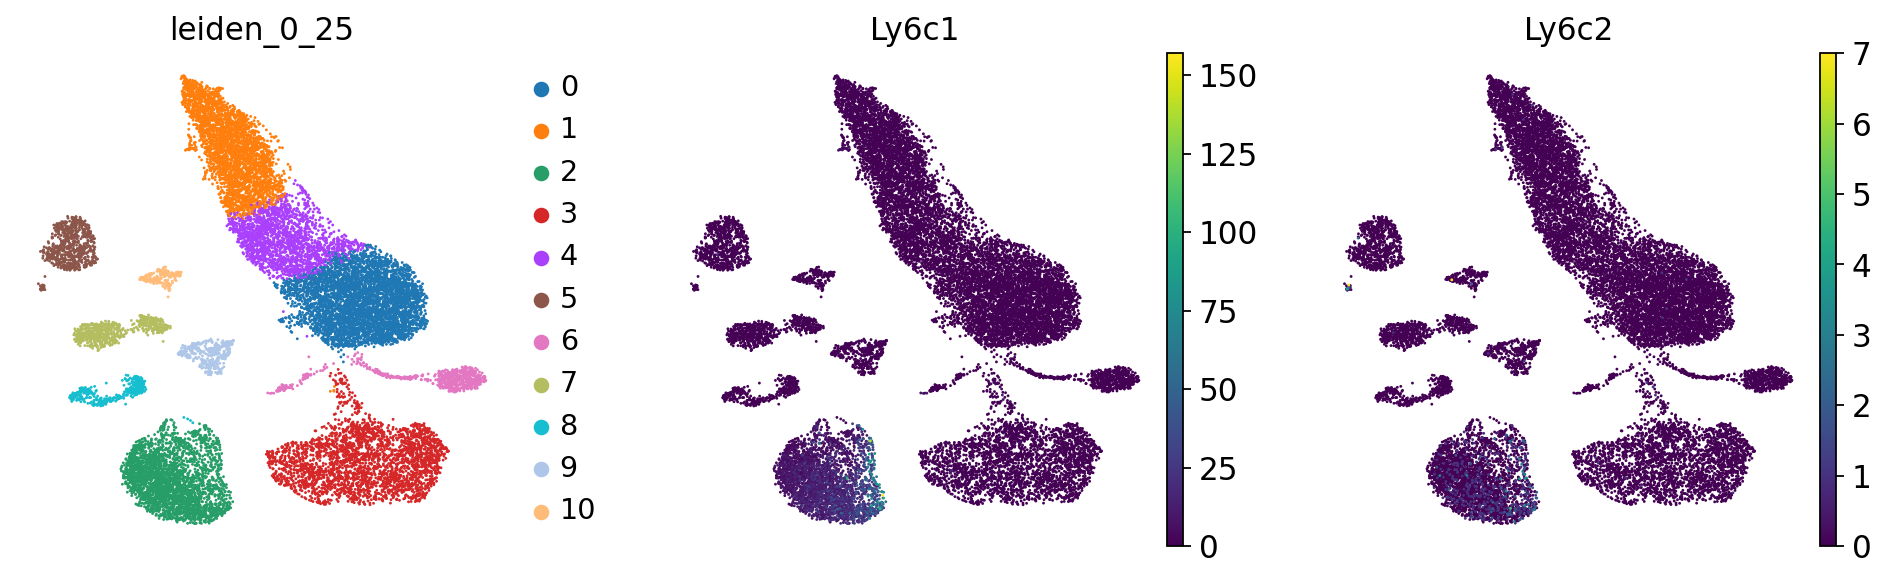

In [23]:
sc.pl.umap(
    adata,
    color=[group_by] + ["Ly6c1", "Ly6c2"],
    # pmax = "p99"
)

In [ ]:
## 9.4 肉眼看图注释
cell_anno = {
    "0": "MDSCs",
    "1": "T cells",
    "2": "Mast cell",
    "3": "Fibroblasts",
    "4": "Epithelial cells",
    "5": "MDSCs",
    "6": "Monocytes",
    "7": "Endothelial cells",
}
adata.obs["manual_celltype_annotation"] = adata.obs[group_by].map(cell_anno)